Creating and example code structure

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pykrige.ok import OrdinaryKriging
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

Retrieving UPPSLA conflict data

In [2]:
directory = "C:/data/UPPSLA conflict data/"
file_name = "Geo_locations_of_conflicts.csv"
path_to_file = directory+file_name

df_UPPSLA_geo= pd.read_csv(path_to_file, encoding="latin1")

C:\Users\fourt\AppData\Local\Temp\ipykernel_15652\2166501869.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_UPPSLA_geo= pd.read_csv(path_to_file, encoding="latin1")


In [4]:
limit_rows_for_now = 1000
df_UPPSLA_geo = df_UPPSLA_geo.head(limit_rows_for_now)
lat = df_UPPSLA_geo["latitude"]
lon = df_UPPSLA_geo["longitude"]
z = df_UPPSLA_geo["high"]

map_df = pd.DataFrame([lon, lat]).transpose()

<AxesSubplot: >

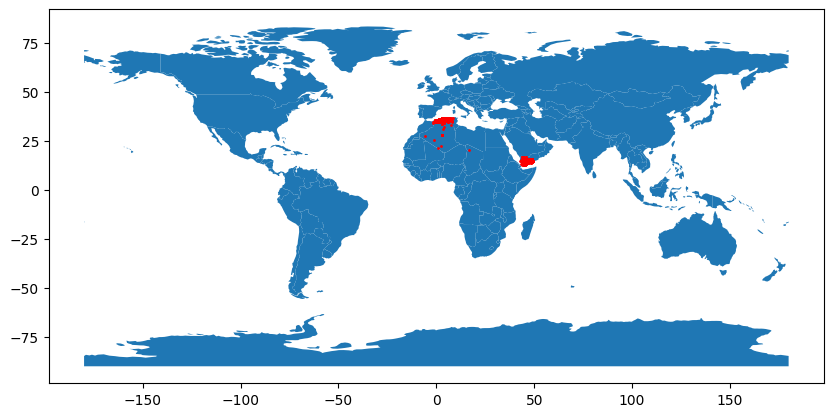

In [5]:
# Plotting data to a map

geometry = [Point(xy) for xy in zip(lon, lat)]

gdf = GeoDataFrame(map_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=1)

In [7]:
N = 500

""" lon = 360.0 * np.random.random(N)
lat = 180.0 / np.pi * np.arcsin(2 * np.random.random(N) - 1)
z = 3.5 * np.random.rand(N) + 2.0 """

# Generate a regular grid with 60° longitude and 30° latitude steps:
grid_lon = np.linspace(0.0, 360.0, N)
grid_lat = np.linspace(-90.0, 90.0, N)

# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)

# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)

# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()